In [56]:
import os

import numpy as np
import matplotlib.pyplot as plt
TT = 40_0000
def getXY(name:str, T=-1):
    if T == -1:
        T = TT
    with open(name, 'r',encoding="utf-8") as file:
        lines = file.readlines()
    ts, fs = [], []
    for i in range(len(lines)):
        sentence = lines[i]
        if i % 2 == 0:
            if int(float(sentence.split()[0])) > T:
                continue
            ts.append(int(float(sentence.split()[0])))
        else:
            fs.append(float(sentence.split()[0].strip("[")))  # '[70.47        2.95153658]'
    x_num = -6
    for i in range(0, len(ts)):
        if ts[i] > ts[i+1]:
            x_num = i + 1  # +1是因为数组从零开始
            break

    X = np.array(ts[:x_num])
    Y = np.zeros(len(X))
    times = 0
    for i in range((len(fs)//x_num) * x_num):
        if i % x_num == 0:
            times += 1
        Y[i % x_num] += fs[i]
    Y /= times
    # print(Y[-1])
    return X, Y

In [57]:
def getFinalInfo(name:str, T=-1):
    if T == -1:
        T = TT
    with open(name, 'r',encoding="utf-8") as file:
        lines = file.readlines()
    ts = []
    fs = []
    for i in range(len(lines)):
        sentence = lines[i]
        if i % 2 == 0:
            if int(float(sentence.split()[0])) > T:
                continue
            ts.append(int(float(sentence.split()[0])))
        else:
            fs.append(float(sentence.split()[0].strip("[")))  # '[70.47        2.95153658]'
    x_num = -6 # !! 每次运行的打印次数 !!
    for i in range(0, len(ts)):
        if ts[i] > ts[i+1]:
            x_num = i + 1  # +1是因为数组从零开始
            break
    finals = []
    for i in range((len(fs)//x_num) * x_num):
        if (i + 1) % x_num == 0:  # 每次运行的最后一行打印
            finals.append(fs[i])
    print(finals)
    return finals


In [58]:
colors = ['red', 'orange', 'yellow', 'green', 'cyan', 'blue', 'purple', 'black', 'grey']
file_colors = dict()
ci = 0
for file_name in os.listdir(os.getcwd()):
    if file_name == '0画.ipynb' or file_name[-3:] == '.py' or file_name[0:2]=='出错': continue
    file_colors[file_name] = colors[ci]
    ci += 1
print(file_colors)


{'控制台MC_Jiao回档并修改_算法等同WrongHamm': 'red', '消融-无ham.py_result.txt': 'orange', '消融实验-无交配.py_result.txt': 'yellow'}


[468.0, 468.0, 468.0, 464.0, 464.0, 465.0, 465.0, 468.0, 468.0, 466.0, 466.0, 466.0, 464.0, 464.0, 464.0, 461.0, 465.0, 465.0, 465.0, 468.0, 468.0, 468.0, 468.0, 468.0, 465.0, 468.0, 468.0, 464.0, 466.0, 466.0]
[464.0, 468.0, 468.0, 464.0, 466.0, 466.0, 464.0, 464.0, 464.0, 466.0, 466.0, 466.0, 468.0, 468.0, 468.0, 465.0, 468.0, 468.0, 468.0, 468.0, 468.0, 464.0, 466.0, 466.0, 464.0, 464.0, 465.0, 465.0, 468.0, 468.0]
[466.0, 466.0, 468.0, 468.0, 468.0, 468.0, 464.0, 465.0, 466.0, 463.0, 465.0, 468.0, 465.0, 465.0, 465.0, 466.0, 466.0, 466.0, 468.0, 468.0, 468.0, 463.0, 466.0, 466.0, 466.0, 466.0, 466.0, 468.0, 468.0, 468.0]
red 控制台MC_Jiao回档并修改_算法等同WrongHamm 466.03333333333336 +- 1.8842968748696896
orange 消融-无ham.py 466.1666666666667 +- 1.6832508230603465
yellow 消融实验-无交配.py 466.3 +- 1.534657099743491


C:\Users\wangli\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 25511 (\N{CJK UNIFIED IDEOGRAPH-63A7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wangli\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21046 (\N{CJK UNIFIED IDEOGRAPH-5236}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wangli\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21488 (\N{CJK UNIFIED IDEOGRAPH-53F0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wangli\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wangli\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26723 (\N{CJK UNIFIED IDEOGRAPH-6863}) missing from current font.
  fig.canvas.print_figure(b

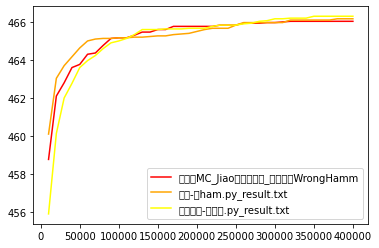

In [59]:
infos = dict()
for fi in file_colors:
    color = file_colors[fi]
    X, Y = getXY(fi)
    plt.plot(X[:], Y[:], color, label=fi)
    infos[fi] = getFinalInfo(fi)
for fi in infos:
    print(file_colors[fi], fi.strip('_result.txt'), np.mean(infos[fi]), '+-', np.std(infos[fi], ddof=1))

# print(Infos)
plt.legend()
plt.show()